In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import bars
import d
import signals
import u

# Chow-Type Dickey-Fuller (Synthetic Data)

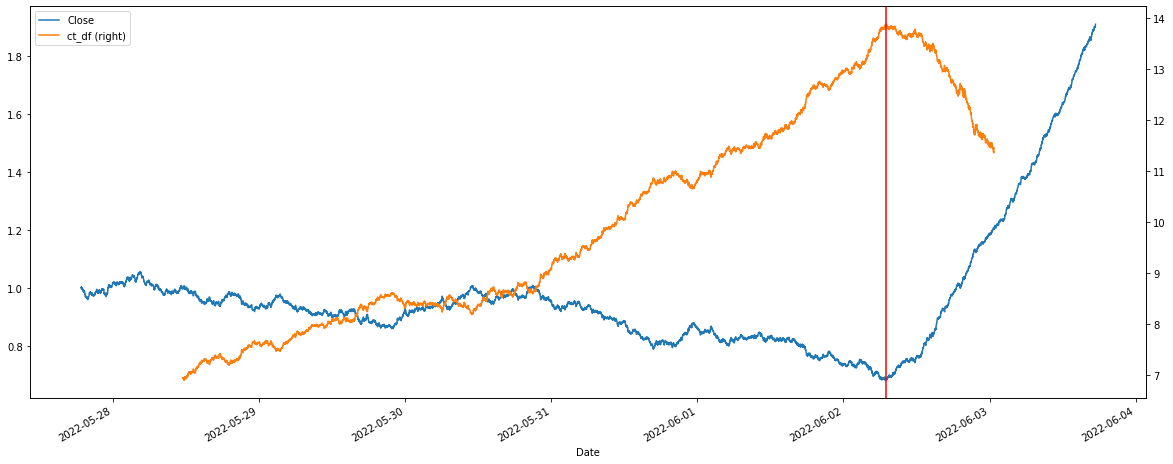

In [3]:
plt.rcParams["figure.figsize"] = (20, 5)

data = u.explosive_process_data(
    start_price=1,
    delta=0.0005,
    noise_stddev=0.002,
    explosive_start_index_percent=0.80,
    n_samples=10000,
)

data["ct_df"] = signals.chow_type_dickey_fuller_statistic(
    data["Close"], avoid_endpoints_percent=0.1
)
data[["Close", "ct_df"]].plot(secondary_y="ct_df", figsize=(20, 8))

plt.axvline(x=data["ct_df"].idxmax(), color="r")

# Supremum Augmented Dickey-Fuller

CPU times: total: 3min 48s
Wall time: 3min 16s


<AxesSubplot:xlabel='Date'>

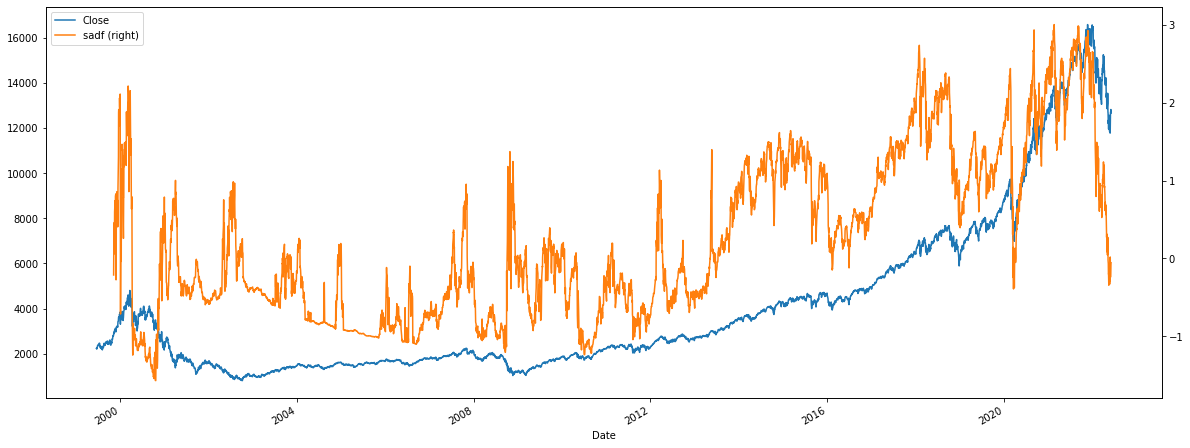

In [5]:
%%time

data = d.fetch("data/future/daily", "NQ.csv")
data["sadf"] = signals.supremum_augmented_dickey_fuller_statistic(
    data["Close"],
    min_window_size=100,
    max_window_size=3100,
    window_step=200,
    stat_step=1,
    maxlag=10,
    autolag=None,
)
data[["Close", "sadf"]].interpolate(method="linear").plot(
    secondary_y="sadf", figsize=(20, 8)
)

<AxesSubplot:xlabel='Date'>

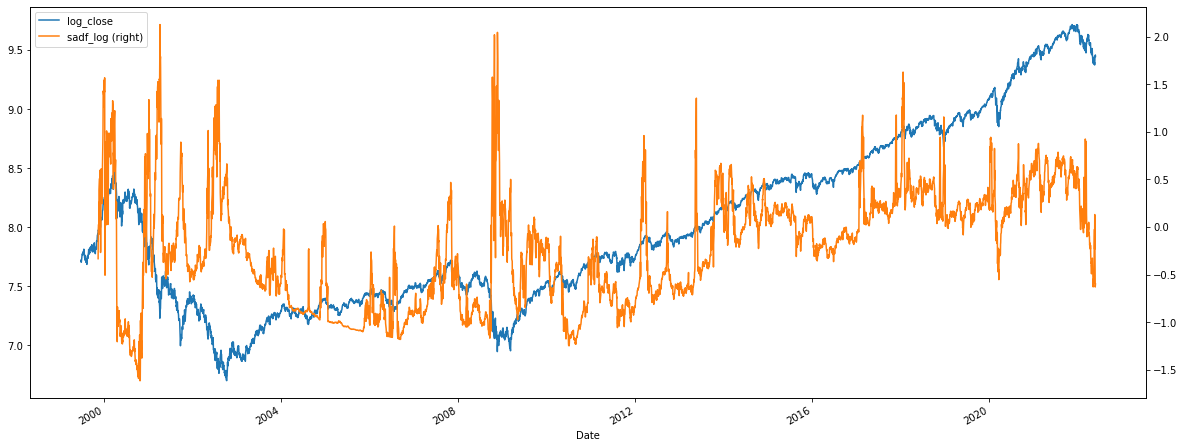

In [7]:
data["log_close"] = np.log(data["Close"])
data["sadf_log"] = signals.supremum_augmented_dickey_fuller_statistic(
    data["log_close"],
    min_window_size=100,
    max_window_size=3100,
    window_step=200,
    stat_step=1,
    maxlag=10,
    autolag=None,
)
data[["log_close", "sadf_log"]].interpolate(method="linear").plot(
    secondary_y="sadf_log", figsize=(20, 8)
)